## Austin Reed

### CLIM670 Assignment #3

Produce daily output for PRECL and PRECC.
Produce monthly output for all default variables.
Choose a variable of interest to you and make seasonal mean (Dec-Jan-Feb, Mar-Apr-May, Jun-Jul-Aug, Sep-Oct-Nov) maps for this variable.
Make longitude-time plot of total precipitation (PRECL+PRECC) averaged 5S-5N for the 4 years of your run.

In [90]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#import proplot as pplt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc

In [91]:
f='/glade/derecho/scratch/areed/archive/bday2/atm/hist/bday2.cam.h0.*.nc'
test_monthly=xr.open_mfdataset(f,combine='nested',concat_dim='time')
test_monthly

<xarray.Dataset>
Dimensions:           (lat: 96, lon: 144, time: 48, lev: 32, ilev: 33, nbnd: 2)
Coordinates:
  * lat               (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) object 0001-02-01 00:00:00 ... 0005-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/401)
    gw                (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    hyam              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    hybm              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    P0                (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    hybi              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    ...                ...
    soa_c1            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c1DDF         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c1SFWET       (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c2            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    soa_c2DDF         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c2SFWET       (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              bday2
    logname:           areed
    host:              derecho7
    initial_file:      b.e20.B1850.f19_g17.release_cesm2_1_0.020.cam.i.0301-0...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [92]:
#variable of interest: 
seasonal_means_precipwater=test_monthly['TMQ'].groupby('time.season').mean(dim='time').compute()
seasonal_means_precipwater

<xarray.DataArray 'TMQ' (season: 4, lat: 96, lon: 144)>
array([[[0.6798639 , 0.67987746, 0.67987984, ..., 0.679859  ,
         0.6798594 , 0.6798606 ],
        [0.73095256, 0.72324055, 0.71572536, ..., 0.7546299 ,
         0.7466874 , 0.73868304],
        [0.82347393, 0.80677986, 0.79070807, ..., 0.87561136,
         0.85777205, 0.8402834 ],
        ...,
        [3.4008887 , 3.412824  , 3.4241345 , ..., 3.3564644 ,
         3.3736248 , 3.3877058 ],
        [3.1990452 , 3.2030003 , 3.20703   , ..., 3.1893597 ,
         3.192633  , 3.1957533 ],
        [3.0018463 , 3.0018513 , 3.0018349 , ..., 3.001858  ,
         3.0018523 , 3.001846  ]],

       [[0.29565373, 0.2956561 , 0.29565656, ..., 0.29565296,
         0.29565302, 0.29565322],
        [0.30896863, 0.30535206, 0.30179974, ..., 0.3201189 ,
         0.31636372, 0.31263712],
        [0.34236225, 0.3343171 , 0.32647428, ..., 0.36798286,
         0.35920152, 0.35066095],
...
        [2.8957586 , 2.9014866 , 2.9078102 , ..., 2.8717756 ,
         2.880812  , 2.8889208 ],
        [2.7725132 , 2.7731154 , 2.7732754 , ..., 2.767547  ,
         2.7694223 , 2.7710915 ],
        [2.711819  , 2.7118275 , 2.7118123 , ..., 2.711818  ,
         2.7118225 , 2.711832  ]],

       [[0.2851838 , 0.2851863 , 0.2851868 , ..., 0.28518286,
         0.28518292, 0.28518316],
        [0.28995228, 0.2861869 , 0.28252622, ..., 0.30193457,
         0.297829  , 0.2938315 ],
        [0.3059267 , 0.29818368, 0.2907181 , ..., 0.331147  ,
         0.32231244, 0.31391928],
        ...,
        [8.276     , 8.289702  , 8.303062  , ..., 8.228221  ,
         8.247281  , 8.263053  ],
        [7.985634  , 7.9908676 , 7.9965158 , ..., 7.971536  ,
         7.9766164 , 7.98119   ],
        [7.7955194 , 7.7958703 , 7.7958045 , ..., 7.7959595 ,
         7.7958827 , 7.7957    ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    units:         kg/m2
    long_name:     Total (vertically integrated) precipitable water
    cell_methods:  time: mean

Text(0.5, 0.98, 'Seasonal means of Precipitable water')

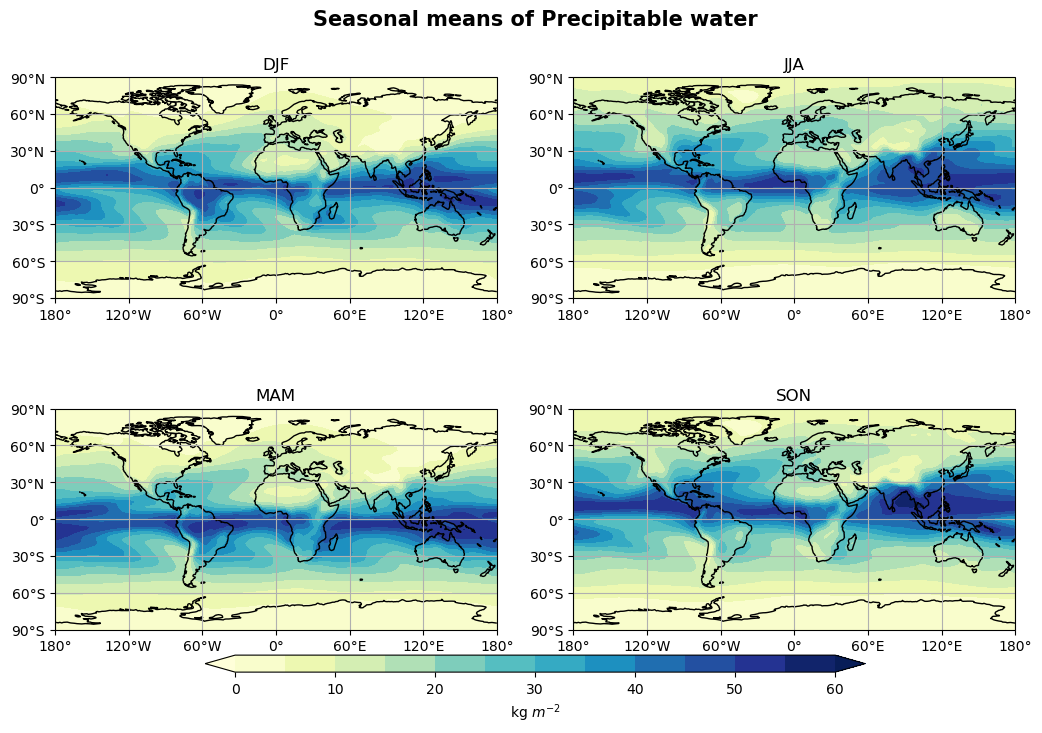

In [97]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
clevs=np.arange(0,65,5)
#Loop over all of the seasons and plot
for i,seas in enumerate(seasonal_means_precipwater['season']):

        # Select the season
        data=seasonal_means_precipwater.sel(season=seas)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=seasonal_means_precipwater['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,seasonal_means_precipwater['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(seas.values)
        axs[i].gridlines()
        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.set_label('kg $m^{-2}$')
# Add a big title at the top
plt.suptitle('Seasonal means of Precipitable water',fontsize=15, fontweight='bold')


In [98]:
f='/glade/derecho/scratch/areed/archive/bday2/atm/hist/bday2.cam.h1.*.nc'
test_daily=xr.open_mfdataset(f,combine='nested',concat_dim='time')
test_daily

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 1461, lev: 32, ilev: 33, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 0001-01-01 00:00:00 ... 0005-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    gw            (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    ...            ...
    f11vmr        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sol_tsi       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    PRECC         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    PRECL         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              bday2
    logname:           areed
    host:              derecho7
    initial_file:      b.e20.B1850.f19_g17.release_cesm2_1_0.020.cam.i.0301-0...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1

In [99]:
test_daily_convective=test_daily['PRECC']
test_daily_largescale=test_daily['PRECL']

In [100]:
test_daily_all=((test_daily_convective+test_daily_largescale)*1000*86400).compute() #converts units from meters per second to mm per day
test_daily_all

<xarray.DataArray (time: 1461, lat: 96, lon: 144)>
array([[[1.42898227e+00, 1.42898572e+00, 1.42898902e+00, ...,
         1.42896514e+00, 1.42897095e+00, 1.42897708e+00],
        [1.93870560e+00, 1.68820388e+00, 1.70964705e+00, ...,
         1.24055266e+00, 1.63307490e+00, 1.92748134e+00],
        [5.06251301e-01, 4.97373255e-01, 5.20423894e-01, ...,
         9.01915072e-01, 6.53905846e-01, 4.85149297e-01],
        ...,
        [7.75460187e-02, 5.85692982e-02, 3.88805244e-02, ...,
         1.62514933e-01, 1.15360647e-01, 8.90286399e-02],
        [9.52616228e-03, 9.92678267e-03, 9.88351499e-03, ...,
         7.39900408e-03, 8.01132298e-03, 8.90734639e-03],
        [2.34587231e-03, 2.34587231e-03, 2.34587231e-03, ...,
         2.34587231e-03, 2.34587231e-03, 2.34587231e-03]],

       [[4.83102279e-01, 4.83108840e-01, 4.83113398e-01, ...,
         4.83095639e-01, 4.83095953e-01, 4.83096974e-01],
        [4.24173387e-01, 4.52417402e-01, 4.78431699e-01, ...,
         3.70403845e-01, 3.75849698e-01, 3.94444990e-01],
        [1.14272585e-01, 1.17749814e-01, 1.24235688e-01, ...,
         1.84930860e-01, 1.64945934e-01, 1.38908769e-01],
...
        [9.53415292e-01, 7.70289384e-01, 6.43319228e-01, ...,
         1.15374330e+00, 1.12773989e+00, 1.07517066e+00],
        [2.37240041e+00, 2.17442635e+00, 1.96343216e+00, ...,
         2.74481921e+00, 2.66765426e+00, 2.54378194e+00],
        [1.26857228e+00, 1.26870901e+00, 1.26875153e+00, ...,
         1.26825726e+00, 1.26882688e+00, 1.26857519e+00]],

       [[1.49608266e-02, 1.49608647e-02, 1.49608794e-02, ...,
         1.49608009e-02, 1.49608021e-02, 1.49608094e-02],
        [1.03633558e-05, 2.17934143e-05, 4.03967611e-05, ...,
         2.08615875e-07, 2.92640780e-07, 1.16290852e-06],
        [1.03221294e-04, 7.43252723e-05, 1.24914955e-04, ...,
         3.10776947e-04, 1.52543888e-04, 8.99345878e-05],
        ...,
        [8.24407351e-01, 7.75271378e-01, 7.65560026e-01, ...,
         1.02030005e+00, 9.74098974e-01, 8.96438965e-01],
        [2.10232983e-01, 2.02534428e-01, 1.94601723e-01, ...,
         2.28571022e-01, 2.23628024e-01, 2.17166873e-01],
        [2.17498477e-02, 2.17488999e-02, 2.17481607e-02, ...,
         2.17516428e-02, 2.17510780e-02, 2.17506557e-02]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0005-01-01 00:00:00

In [101]:
latitudes=test_daily_all['lat']
#latitudes

In [102]:
lat_radians=latitudes*(np.pi/180.)
clat=np.cos(lat_radians)
#clat

In [103]:
#extract latitudes between 5S and 5N and generate area-weighted mean to get funciton of P(longitude,time)
precip_tropics= test_daily_all.where((test_daily_all['lat'] >= -5) & (test_daily_all['lat'] <= 5), drop=True).weighted(weights=clat).mean(dim='lat')
precip_tropics

<xarray.DataArray (time: 1461, lon: 144)>
array([[ 0.9070169 ,  1.37860217,  2.51889737, ...,  1.41232715,
         1.07319712,  0.70043521],
       [ 1.99688329,  3.56210382,  5.43690009, ...,  0.61359057,
         0.81905666,  1.18693483],
       [ 1.94055884,  3.45945665,  4.1644147 , ...,  0.31369879,
         0.21441549,  0.63215522],
       ...,
       [ 2.34858582,  5.01101233,  8.36401401, ...,  0.54721262,
         0.453193  ,  0.71524746],
       [ 4.56032342,  8.50256826, 14.55689628, ...,  2.21622676,
         2.10991917,  1.88081004],
       [ 5.3435623 ,  8.56686227, 21.36850283, ...,  4.27916347,
         3.78629394,  4.92386195]])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0005-01-01 00:00:00

In [104]:
data=precip_tropics

In [83]:
print(np.nanmin(data))
print(np.nanmax(data))

1.0957427891176742e-11
64.4308173936575


In [105]:
# Get times and make array of datetime objects
vtimes = data.time.values.astype('datetime64[ms]').astype('O')
vtimes

array([datetime.datetime(1, 1, 1, 0, 0), datetime.datetime(1, 1, 2, 0, 0),
       datetime.datetime(1, 1, 3, 0, 0), ...,
       datetime.datetime(4, 12, 30, 0, 0),
       datetime.datetime(4, 12, 31, 0, 0),
       datetime.datetime(5, 1, 1, 0, 0)], dtype=object)

In [108]:
# Specify longitude values for chosen domain
lons = data.lon.values

Text(1.0, 1.0, 'Time Range: 1-01-01 00:00Z - 5-01-01 00:00Z')

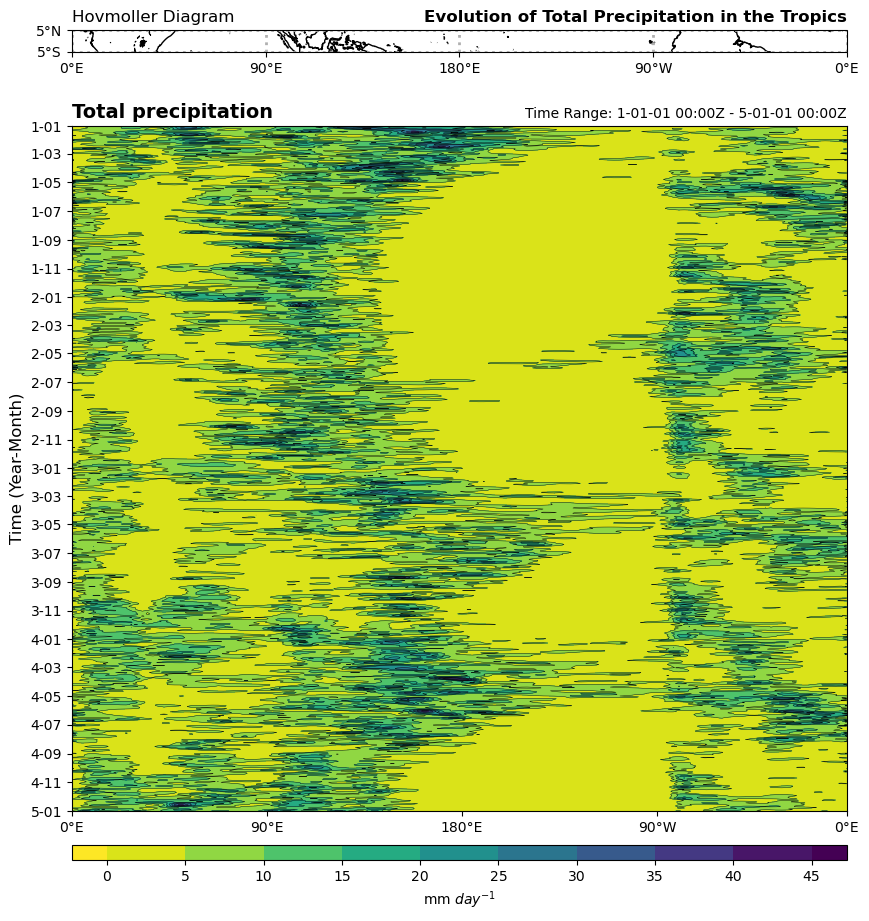

In [140]:
import matplotlib.dates as mdates

# Start figure
fig = plt.figure(figsize=(10, 13))

# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 6], hspace=0.03)

# Tick labels
x_tick_labels = [u'0\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}E',
                 u'180\N{DEGREE SIGN}E', u'90\N{DEGREE SIGN}W',
                 u'0\N{DEGREE SIGN}E']

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([0, 357.5, -5, 5], ccrs.PlateCarree(central_longitude=180))
ax1.set_yticks([-5, 5])
ax1.set_yticklabels([u'5\N{DEGREE SIGN}S', u'5\N{DEGREE SIGN}N'])
ax1.set_xticks([-180, -90, 0, 90, 180])
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('Evolution of Total Precipitation in the Tropics', loc='right',fontweight='bold')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
# Set y-axis ticks to show every 2 months
ax2.yaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_ylabel("Time (Year-Month)", fontsize=12)

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.arange(0, 50, 5)

cf = ax2.contourf(lons, vtimes, mpcalc.smooth_n_point(
    data, 9, 2), clevs, cmap=plt.cm.viridis_r, extend='both')
cs = ax2.contour(lons, vtimes, mpcalc.smooth_n_point(
    data, 9, 2), clevs, colors='k', linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
cbar.set_label('mm $day^{-1}$')

# Make some ticks and tick labels
ax2.set_xticks([0, 90, 180, 270, 357.5])
ax2.set_xticklabels(x_tick_labels)
# Set some titles
plt.title('Total precipitation', loc='left', fontsize=14,fontweight='bold')
time_format = "%Y-%m-%d %H:%MZ"
plt.title('Time Range: {0} - {1}'.format(vtimes[0].strftime(time_format), 
                                         vtimes[-1].strftime(time_format)),
          loc='right', fontsize=10)


